Test the behavious of the package when different modes are selects, and
for different retardatio ratios

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# testing WAM for various retardatio ratios

# from importlib import reload
import curses  ####  pip install windows-curses
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import specsanalyzer

# load the module and import functions for reading the parameter table from the calib2d file
import specsanalyzer.convert

# let's get all the functions to be tested
from specsanalyzer import SpecsAnalyzer
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm
from specsanalyzer.convert import calculate_matrix_correction


spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict = spa.config
lens_mode = "WideAngleMode"
kinetic_energy = 35.000000
pass_energy = 35.000000
work_function = 4.3
binning = 4

eshift = np.array(config_dict["calib2d_dict"]["eShift"])

aInner, damatrix = get_damatrix_fromcalib2d(
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    config_dict,
)

dapolymatrix = calculate_polynomial_coef_da(
    damatrix, kinetic_energy, pass_energy, eshift
)

In [6]:
# testing ..
# check the behaviour for various lens modes
lensmodes_angle = [
    "WideAngleMode",
    "LowAngularDispersion",
    "MediumAngularDispersion",
    "HighAngularDispersion",
    "WideAngleMode",
    "SuperWideAngleMode"
]
lensmodes_space =[
    "LargeArea",
    "MediumArea",
    "SmallArea",
    "SmallArea2",
    "HighMagnification2",
    "HighMagnification",
    "MediumMagnification",
    "LowMagnification"
]

print(lensmodes_angle)
print(lensmodes_space)


['WideAngleMode', 'LowAngularDispersion', 'MediumAngularDispersion', 'HighAngularDispersion', 'WideAngleMode', 'SuperWideAngleMode']
['LargeArea', 'MediumArea', 'SmallArea', 'SmallArea2', 'HighMagnification2', 'HighMagnification', 'MediumMagnification', 'LowMagnification']


TODO
        try all possible modes

        minimum and max rr for each mode:
            [LowAngularDispersion@0.070]
            [LowAngularDispersion@30.000]
            Da1 Da3 Da5 Da7

            [MediumAngularDispersion@0.100]
            [MediumAngularDispersion@54.000]
            Da1 Da3 Da5 **

            [HighAngularDispersion@0.100]
            [HighAngularDispersion@65.000]
            Da1 Da3

            [WideAngleMode@0.10]
            [WideAngleMode@10.00]
            Da1 Da3 Da5 Da7

            [SuperWideAngleMode@0.060]
            [SuperWideAngleMode@10.000]
            Da1 Da3 Da5 Da7


# =================== LargeArea =================== 
Spatially resolved modes have only a Da1 coefficient, these have to 
be treated independently (result is mm not in degree!)

[LargeArea defaults]
aUnit  = "mm"
aInner = 18 # mm
aRange = -18 18 # mm
aGrid  = 2 # mm
eGrid  = 0.02 # Ep
Da1    = 1 1 1 # mm_z/mm

[LargeArea@0.1]
[LargeArea@1000]
[MediumArea@0.1]
[MediumArea@500]
[SmallArea@0.1]
[SmallArea@1500]
[SmallArea2@0.2]
[SmallArea2@300]
[HighMagnification2@0.1]
[HighMagnification2@300]
[HighMagnification@0.1]
[HighMagnification@1500]
[MediumMagnification@0.1]
[MediumMagnification@1500]
[LowMagnification@0.1]
[LowMagnification@1500]




From specs manual

Lens Mode Dispersion D Acceptance angle Energy range
High Angular Dispersion 3.2 mm/º ±3º Ep × [0.10 – 65]
Medium Angular Dispersion 2.3 mm/º ±4º Ep × [0.10 – 300]
Low Angular Dispersion 1.5 mm/º ±7º Ep × [0.05 – 30]
Medium Angle Mode 1.0 mm/° ±10° Ep × [0.07 – 20]
Wide Angle Mode 0.75 mm/º ±15º Ep × [0.10 – 10]


            what to do if the selected data exceeds this mode? 

        what is the behaviour when the mode as no angular resolution?
            shall if just build a simplified case structure??
        
        We need to check what is the proper way of converting images with less das

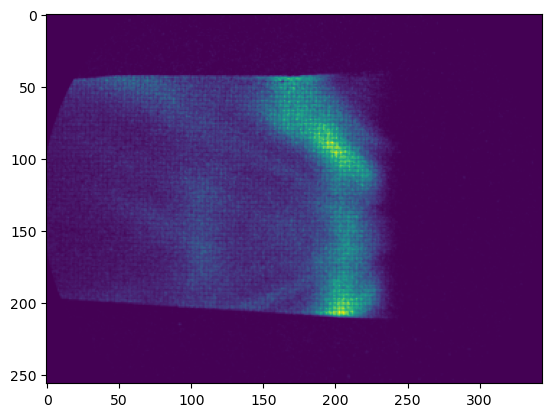

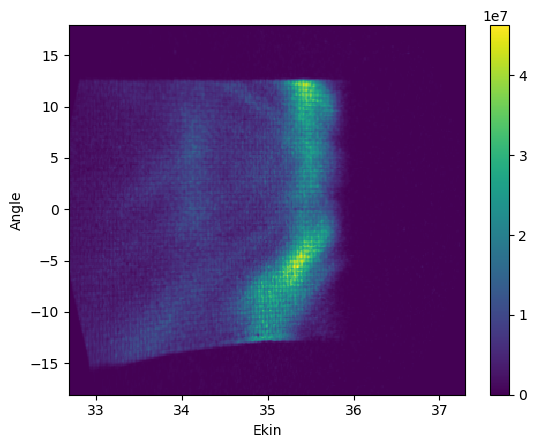

In [4]:
with open("../tests/data/dataEPFL/R9132/Data9132_RAWDATA.tsv") as file:
    tsv_data = np.loadtxt(file, delimiter="\t")
plt.figure()
plt.imshow(tsv_data)
# Testing convert and crop on the imported data
spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")

lens_mode = "WideAngleMode"
kinetic_energy = 35.0
pass_energy = 35.0
work_function = 4.2

res_xarray = spa.convert_image(
    tsv_data, lens_mode, kinetic_energy, pass_energy, work_function
)
plt.figure()
res_xarray.plot(cmap="viridis", vmin=0)